## Извлечение данных

In [2]:
import zipfile
import json
import pandas as pd
from tqdm import tqdm

In [3]:
df=pd.DataFrame(columns=['text','category','id_category'])
with zipfile.ZipFile(r'C:\Users\egork\Desktop\WS_ML2021\data\src_files.zip') as z:
  for filename in tqdm(z.namelist()):
    with z.open(filename) as f:
      text=f.read()
      s=text.decode('utf-8')
      js=json.loads(s)
      for feed in js['feed']:
        try:
          title=feed['meta']['title']
          if title=='Сообщение пользователя':
            msg=''
            for t in feed['payload']['body']:
              msg+=t['text']+' '
        except:
          continue
      ctg=js['reason']['category']['name']
      id_ctg=js['reason']['category']['id']
      df.loc[len(df)]=[msg.replace('X',''),ctg,id_ctg]

100%|███████████████████████████████████████████████████████████████████████████| 59889/59889 [03:17<00:00, 302.71it/s]


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59889 entries, 0 to 59888
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   text         59889 non-null  object
 1   category     59889 non-null  object
 2   id_category  59889 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.8+ MB


In [5]:
df.head()

,text,category,id_category
0,"1й подъезд, 5 этаж. В коридоре над висит ка...",Содержание МКД,10
1,Маленькмй лифт изрисован внутри.,Содержание МКД,10
2,реклама на светофоре,Благоустройство,3
3,"1й подъезд, 5 этаж, квартирный холл. Рааботник...",Содержание МКД,10
4,незаконная решетка на фасаде,Нарушение правил пользования общим имуществом,23


## Предобработка

In [6]:
!pip install pymorphy2

Defaulting to user installation because normal site-packages is not writeable


In [7]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pymorphy2
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\egork\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\egork\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\egork\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
df.head()

,text,category,id_category
0,"1й подъезд, 5 этаж. В коридоре над висит ка...",Содержание МКД,10
1,Маленькмй лифт изрисован внутри.,Содержание МКД,10
2,реклама на светофоре,Благоустройство,3
3,"1й подъезд, 5 этаж, квартирный холл. Рааботник...",Содержание МКД,10
4,незаконная решетка на фасаде,Нарушение правил пользования общим имуществом,23


In [9]:
text=df['text']
norm_text=[]
morph=pymorphy2.MorphAnalyzer()
for s in tqdm(text):
    s1 = re.sub(r'[^\w\s]+|[\d]+', r'',s).strip()
    s1 = s1.lower()
    s1 = word_tokenize(s1)
    words=[]
    for i in s1:
        pv = morph.parse(i)
        words.append(pv[0].normal_form)
    sentence=' '.join(words)
    norm_text.append(sentence)

100%|███████████████████████████████████████████████████████████████████████████| 59889/59889 [02:35<00:00, 384.44it/s]


In [10]:
norm_text[:1]

['й подъезд этаж в коридор над висеть какойтый провод возможно под напряжение председатель тсж ленинградский вечер отказываться принимать заявка на устранение более полгода']

In [11]:
df['text'][:1].values[0]

'1й подъезд, 5 этаж. В коридоре над    висит какой-то провод. Возможно, под напряжением.\nПредседатель тсж "Ленинградские Вечера" отказывается принимать заявку на устранение более полугода.                                    '

In [12]:
russian_stopwords = stopwords.words("russian")
vectorizer = CountVectorizer(max_features=500, min_df=20, max_df=0.7, stop_words=russian_stopwords)
text_cv = vectorizer.fit_transform(norm_text)
text_cv = pd.DataFrame(text_cv.toarray(),columns=vectorizer.get_feature_names())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [13]:
import pickle 
pickle.dump(vectorizer, open('vectorizer.sav', 'wb'))

In [15]:
check = pickle.load(open('vectorizer.sav', 'rb'))
test_kek = check.fit_transform(norm_text)
test_kek =pd.DataFrame(test_kek.toarray(),columns=check.get_feature_names())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [16]:
test_kek

,httpgorodgovspbruproblems,аварийный,автомобиль,административный,администрация,адрес,арка,асфальт,асфальтовый,бак,...,щит,щиток,элемент,этаж,это,являться,ям,яма,январь,ящик
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59884,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59885,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
59886,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59887,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
text_cv

,httpgorodgovspbruproblems,аварийный,автомобиль,административный,администрация,адрес,арка,асфальт,асфальтовый,бак,...,щит,щиток,элемент,этаж,это,являться,ям,яма,январь,ящик
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59884,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59885,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
59886,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59887,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
text_cv['id_category'] = df['id_category']
text_cv

,httpgorodgovspbruproblems,аварийный,автомобиль,административный,администрация,адрес,арка,асфальт,асфальтовый,бак,...,щиток,элемент,этаж,это,являться,ям,яма,январь,ящик,id_category
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,10
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,10
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59884,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
59885,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,2
59886,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,61
59887,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,61


In [14]:
#методы понижения размерности (pca, tsne)
#понизить до 2-3 признаков - нарисовать графики - раскрасить в соответствии с категориями

In [15]:
from sklearn.cluster import KMeans
import numpy as np 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [16]:
category = pd.unique(df['id_category'])
len(category)

27

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import random


In [18]:

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(text_cv)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf

,principal component 1,principal component 2
0,-6.056331,0.385246
1,-6.054246,-0.184539
2,-13.051658,-0.365638
3,-6.057598,0.676990
4,6.948535,-0.247303
...,...,...
59884,-14.058355,-0.461860
59885,-14.063231,0.026208
59886,44.951529,-0.204408
59887,44.945469,-0.238702


In [19]:
finalDf = pd.concat([principalDf, df[['id_category']]], axis = 1)
finalDf

,principal component 1,principal component 2,id_category
0,-6.056331,0.385246,10
1,-6.054246,-0.184539,10
2,-13.051658,-0.365638,3
3,-6.057598,0.676990,10
4,6.948535,-0.247303,23
...,...,...,...
59884,-14.058355,-0.461860,2
59885,-14.063231,0.026208,2
59886,44.951529,-0.204408,61
59887,44.945469,-0.238702,61


In [20]:
!pip install matplotlib
import matplotlib.pyplot as plt
# import plotly.plotly as py

Defaulting to user installation because normal site-packages is not writeable


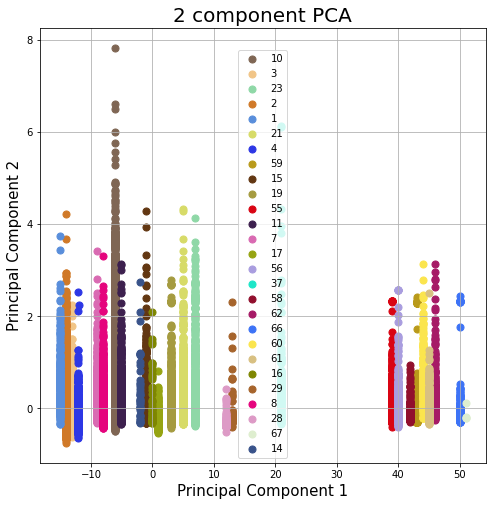

In [21]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
colors= []
for i in range(27):
    color = "#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
    if color in colors:
        while color in colors:
            color = "#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
    colors.append(color)
for target, color in zip(category,colors):
    indicesToKeep = finalDf['id_category'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(category)
ax.grid()

In [22]:
list1 = finalDf['id_category'].value_counts()
list1

2     15076
10    13453
3      9839
19     3663
55     2771
59     2567
23     2170
56     1831
21     1483
61     1164
4      1008
8       825
17      700
66      673
15      588
11      434
62      254
58      251
37      243
1       239
7       221
60      198
28       76
29       73
16       45
14       40
67        4
Name: id_category, dtype: int64

In [23]:
DF = finalDf.groupby(['principal component 1','principal component 2'])['id_category'].value_counts()
DF

principal component 1  principal component 2  id_category
-15.067732              3.738188              1              1
-15.065685              2.701454              1              1
-15.064260              1.588979              1              1
-15.063292              1.368992              1              1
-15.063149              2.557824              1              1
                                                            ..
 49.970251              2.326842              66             1
 50.937070             -0.215534              67             1
 50.938076             -0.197096              67             1
 50.939595              0.109128              67             1
 50.942996             -0.200430              67             1
Name: id_category, Length: 35965, dtype: int64

In [24]:
DF1 = finalDf['id_category'].value_counts().reset_index()
DF1 = DF1[:10]
df_filtered = pd.DataFrame()
listindex = []
for i in range(10):
    listindex.append(DF1.loc[i]['index'])
    
for i in range(10):
    time_df = finalDf.query(f'id_category == {listindex[i]}') 
    df_filtered =  pd.concat([df_filtered, time_df])
df_filtered

,principal component 1,principal component 2,id_category
6,-14.056208,0.213706,2
9,-14.054929,-0.391142,2
12,-14.057842,-0.459331,2
16,-14.056386,-0.200147,2
17,-14.055074,-0.398405,2
...,...,...,...
59742,44.944356,-0.230721,61
59806,44.944757,-0.252770,61
59860,44.946606,-0.074556,61
59886,44.951529,-0.204408,61


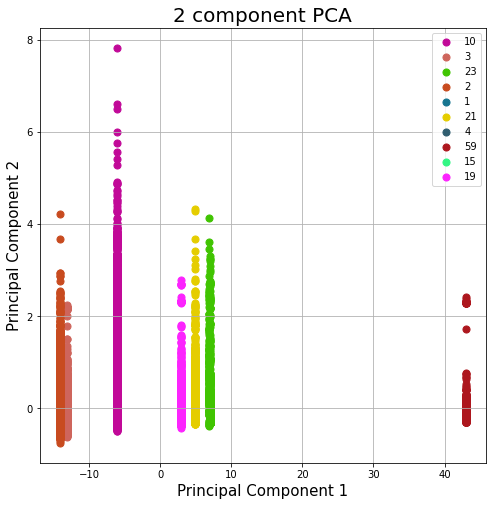

In [25]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
colors= []
for i in range(10):
    color = "#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
    if color in colors:
        while color in colors:
            color = "#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
    colors.append(color)
for target, color in zip(category,colors):
    indicesToKeep = df_filtered['id_category'] == target
    ax.scatter(df_filtered.loc[indicesToKeep, 'principal component 1']
               , df_filtered.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(category)
ax.grid()

In [26]:
#кластеризация

In [27]:

from sklearn.cluster import KMeans



In [30]:
# Описываем модель
model = KMeans(n_clusters=24)

# Проводим моделирование
model.fit(final_array)

# Предсказание на всем наборе данных
all_predictions = model.predict(final_array)

# Выводим предсказания
print(all_predictions)

[16  0  8 ... 11 11  8]


In [29]:

final_array  = principalDf.to_numpy()
final_array

array([[ -6.05633112,   0.38524624],
       [ -6.05424625,  -0.18453947],
       [-13.05165786,  -0.36563803],
       ...,
       [ 44.95152935,  -0.20440756],
       [ 44.94546916,  -0.23870188],
       [-13.05746971,   0.09418285]])

In [31]:
#классификация
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [32]:
y = text_cv.id_category
x = text_cv.drop('id_category',axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

model =  RandomForestRegressor(n_estimators=10 ,
                               random_state=1)
model.fit(x_train, y_train) # обучение
pred_y = model.predict(x_test)

In [33]:
RF = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0).fit(x_train, y_train) 
y_pred = RF.predict(x_test) 
print(round(RF.score(x_test, y_test), 4)) 
print(y_pred)

0.5994
[10 10  2 ...  2  2  2]


In [34]:
KNN_model = KNeighborsClassifier()
KNN_model.fit(x_train,y_train)
KNN_prediction = KNN_model.predict(x_test)

In [35]:
print(accuracy_score(KNN_prediction, y_test))
print(classification_report(KNN_prediction, y_test))

0.7373518116547003
              precision    recall  f1-score   support

           1       0.34      0.32      0.33        47
           2       0.79      0.70      0.74      3427
           3       0.70      0.65      0.68      2123
           4       0.56      0.70      0.62       156
           7       0.36      0.32      0.34        37
           8       0.57      0.70      0.63       122
          10       0.85      0.89      0.87      2566
          11       0.38      0.52      0.44        63
          14       0.00      0.00      0.00         2
          15       0.88      0.89      0.88       118
          16       0.11      1.00      0.20         1
          17       0.13      0.42      0.20        36
          19       0.75      0.66      0.70       808
          21       0.53      0.68      0.60       242
          23       0.86      0.74      0.80       511
          28       0.00      0.00      0.00         0
          29       0.11      1.00      0.20         1
        

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
scores = cross_val_score(KNN_model,x_train,y_train, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


0.72 accuracy with a standard deviation of 0.00


In [37]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.72 accuracy with a standard deviation of 0.00


In [38]:
#Метрики

In [39]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

In [40]:
# матрица ошибок
lr_auc = confusion_matrix(y_test.tolist(),KNN_prediction)
lr_auc

array([[  15,    1,    0,    0,    4,    1,   21,    0,    0,    1,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    1,    0,    0],
       [   3, 2410,  385,   43,    0,    6,   51,    3,    0,    3,    0,
          13,   31,   24,   40,    0,    0,    0,   29,    5,    1,    9,
           0,    7,    0,    0,    0],
       [   0,  490, 1388,    1,    0,    1,    9,    0,    0,    0,    0,
           3,    9,    2,   17,    0,    0,    0,   12,    4,    0,   48,
           0,    2,    0,    1,    0],
       [   0,   59,   12,  109,    0,    0,    3,    0,    0,    0,    0,
           1,    6,    0,    1,    0,    0,    0,    0,    0,    0,    3,
           0,    1,    0,    0,    0],
       [   1,    0,    0,    0,   12,    3,    9,    1,    0,    7,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0],
       [   0,   26,    3,    0,    1,   86,   19,    1,    0,    

In [41]:
lr_auc = confusion_matrix(y_test.tolist(),y_pred)
lr_auc

array([[   0,    2,    0,    0,    0,    0,   42,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0],
       [   0, 2840,   91,    0,    0,    0,  123,    0,    0,    0,    0,
           0,    5,    0,    0,    0,    0,    0,    1,    1,    0,    0,
           0,    2,    0,    0,    0],
       [   0, 1178,  795,    0,    0,    0,    4,    0,    0,    0,    0,
           0,    5,    0,    0,    0,    0,    0,    2,    3,    0,    0,
           0,    0,    0,    0,    0],
       [   0,  191,    0,    0,    0,    0,    1,    0,    0,    0,    0,
           0,    2,    0,    0,    0,    0,    0,    0,    0,    0,    1,
           0,    0,    0,    0,    0],
       [   0,   15,    0,    0,    0,    0,   18,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0],
       [   0,  118,    0,    0,    0,    0,   32,    0,    0,    

In [42]:
# Accuracy
import sklearn.metrics

In [43]:

acc = sklearn.metrics.accuracy_score(y_test.tolist(),y_pred)
acc
acc = sklearn.metrics.accuracy_score(y_test.tolist(),KNN_prediction)
acc
pc = precision_score(y_test.tolist(),y_pred,average='micro')
pc
pc = precision_score(y_test.tolist(),KNN_prediction, average='weighted')
pc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.7390413236359221

In [44]:

acc = sklearn.metrics.accuracy_score(y_test.tolist(),KNN_prediction)
acc

0.7373518116547003

In [45]:
from sklearn.metrics import precision_score

In [46]:
#precision_score
pc = precision_score(y_test.tolist(),y_pred,average='micro')
pc

0.5994322925363166

In [47]:
pc = precision_score(y_test.tolist(),KNN_prediction, average='weighted')
pc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.7390413236359221

In [48]:
#веса классов 
#попробовать поиграть не с голыми векторами, а с pca-признаками

In [49]:
from sklearn.utils.class_weight import compute_class_weight

In [50]:
class_weight = compute_class_weight(class_weight = 'balanced',
                                    classes = np.unique(y_train),
                                    y = y_train )
class_weights = dict(zip(np.unique(y_train), class_weight))

In [51]:
class_weights = compute_class_weight(class_weight = 'balanced', classes= np.unique(y_train), y= y_train)

In [52]:
from sklearn.utils import class_weight
class_weights=class_weight.compute_class_weight(class_weight='balanced',classes=np.unique(y_train),y=y_train)

In [53]:
model = LogisticRegression(multi_class='multinomial',max_iter=10000,class_weight = class_weights)
model.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\class_weight.py:45: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":


ValueError: class_weight must be dict, 'balanced', or None, got: array([9.09990503e+00, 1.47713434e-01, 2.25991019e-01, 2.18263405e+00,
       9.43873128e+00, 2.62886145e+00, 1.64945295e-01, 5.11377949e+00,
       5.37721661e+01, 3.79162710e+00, 4.92911523e+01, 3.04370752e+00,
       6.01111613e-01, 1.50891282e+00, 1.02393623e+00, 3.11312541e+01,
       2.77262731e+01, 9.29047896e+00, 8.08051676e-01, 1.21623131e+00,
       8.65600723e+00, 8.59729400e-01, 1.06896475e+01, 1.88975664e+00,
       8.53116097e+00, 3.30443479e+00, 5.91493827e+02])

In [ ]:
#попробовать поиграть не с голыми векторами, а с pca-признаками

In [54]:
finalDf

,principal component 1,principal component 2,id_category
0,-6.056331,0.385246,10
1,-6.054246,-0.184539,10
2,-13.051658,-0.365638,3
3,-6.057598,0.676990,10
4,6.948535,-0.247303,23
...,...,...,...
59884,-14.058355,-0.461860,2
59885,-14.063231,0.026208,2
59886,44.951529,-0.204408,61
59887,44.945469,-0.238702,61


In [55]:
y = finalDf.id_category
x = finalDf.drop('id_category',axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

model =  RandomForestRegressor(n_estimators=10 ,
                               random_state=1)
model.fit(x_train, y_train) # обучение
pred_y = model.predict(x_test)

In [56]:
RF = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0).fit(x_train, y_train) 
y_pred = RF.predict(x_test) 
print(round(RF.score(x_test, y_test), 4)) 
print(y_pred)

0.9874
[19  2 61 ...  2 19  2]


In [57]:
KNN_model = KNeighborsClassifier()
KNN_model.fit(x_train,y_train)
KNN_prediction = KNN_model.predict(x_test)

In [58]:
print(accuracy_score(KNN_prediction, y_test))
print(classification_report(KNN_prediction, y_test))

1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        43
           2       1.00      1.00      1.00      3041
           3       1.00      1.00      1.00      1986
           4       1.00      1.00      1.00       197
           7       1.00      1.00      1.00        45
           8       1.00      1.00      1.00       159
          10       1.00      1.00      1.00      2661
          11       1.00      1.00      1.00       105
          14       1.00      1.00      1.00         8
          15       1.00      1.00      1.00        98
          16       1.00      1.00      1.00        10
          17       1.00      1.00      1.00       128
          19       1.00      1.00      1.00       730
          21       1.00      1.00      1.00       272
          23       1.00      1.00      1.00       437
          28       1.00      1.00      1.00        19
          29       1.00      1.00      1.00        19
          37       1.00

In [59]:
print(accuracy_score(KNN_prediction, y_test))

1.0


In [60]:
scores = cross_val_score(KNN_model,x_train,y_train, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


1.00 accuracy with a standard deviation of 0.00


In [61]:
acc = sklearn.metrics.accuracy_score(y_test.tolist(),y_pred)
acc



0.9873935548505594

In [62]:
acc1 = sklearn.metrics.accuracy_score(y_test.tolist(),KNN_prediction)
acc1

1.0

In [63]:
pc = precision_score(y_test.tolist(),y_pred,average='micro')
pc


0.9873935548505594

In [65]:
pc1 = precision_score(y_test.tolist(),KNN_prediction, average='micro')
pc1

1.0

In [66]:
finalDf.to_csv('filePCA.csv') 

In [67]:
text_cv.to_csv('fileMAIN.csv') 

In [69]:
y = text_cv.id_category
x = text_cv.drop('id_category',axis=1)
x.to_csv('XMAIN.csv',index=False) 
y.to_csv('YMAIN.csv') 

In [70]:
y = finalDf.id_category
x = finalDf.drop('id_category',axis=1)
x.to_csv('XPCA.csv') 
y.to_csv('YPCA.csv') 

In [4]:
import pandas as pd
text_cv=pd.read_csv('XMAIN.csv')
text_cv=text_cv.drop(['Unnamed: 0'],axis=1)
text_cv.head()

,httpgorodgovspbruproblems,аварийный,автомобиль,административный,администрация,адрес,арка,асфальт,асфальтовый,бак,...,щит,щиток,элемент,этаж,это,являться,ям,яма,январь,ящик
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
from sklearn.utils.class_weight import compute_class_weight
text_cv_y=pd.read_csv('YMAIN.csv')

In [6]:
text_cv_y.head()

,Unnamed: 0,id_category
0,0,10
1,1,10
2,2,3
3,3,10
4,4,23


In [7]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
class_weight = compute_class_weight(class_weight = 'balanced',
                                    classes = np.unique(text_cv_y['id_category']),
                                    y = text_cv_y['id_category'])

In [9]:
d_class_weights = dict(enumerate(class_weight))
print(d_class_weights)

{0: 9.280799628079963, 1: 0.1471286223873117, 2: 0.2254407064855281, 3: 2.2005070546737215, 4: 10.036701860231272, 5: 2.6886195286195287, 6: 0.1648785483617863, 7: 5.1108550947260625, 8: 55.452777777777776, 9: 3.7722978080120937, 10: 49.291358024691355, 11: 3.168730158730159, 12: 0.6055449388782722, 13: 1.495691915786319, 14: 1.0221710189452125, 15: 29.185672514619885, 16: 30.385083713850836, 17: 9.128029263831733, 18: 0.8004731544969726, 19: 1.211420595909946, 20: 8.83709606020363, 21: 0.8640869151192486, 22: 11.202581369248035, 23: 1.9055937380679648, 24: 8.732720909886265, 25: 3.2958560343404324, 26: 554.5277777777778}


In [18]:
class_orig = np.unique(text_cv_y['id_category'])
d= {k:v for k, v in zip(class_orig, np.arange(27))}
d

{1: 0,
 2: 1,
 3: 2,
 4: 3,
 7: 4,
 8: 5,
 10: 6,
 11: 7,
 14: 8,
 15: 9,
 16: 10,
 17: 11,
 19: 12,
 21: 13,
 23: 14,
 28: 15,
 29: 16,
 37: 17,
 55: 18,
 56: 19,
 58: 20,
 59: 21,
 60: 22,
 61: 23,
 62: 24,
 66: 25,
 67: 26}

In [19]:
text_cv_y['target']=text_cv_y['id_category'].map(d)
text_cv_y.head(10)

,Unnamed: 0,id_category,target
0,0,10,6
1,1,10,6
2,2,3,2
3,3,10,6
4,4,23,14
5,5,10,6
6,6,2,1
7,7,1,0
8,8,3,2
9,9,2,1


In [21]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class='multinomial',max_iter=10000,class_weight = d_class_weights)
model.fit(text_cv[:20000],text_cv_y['target'][:20000])

LogisticRegression(class_weight={0: 9.280799628079963, 1: 0.1471286223873117,
                                 2: 0.2254407064855281, 3: 2.2005070546737215,
                                 4: 10.036701860231272, 5: 2.6886195286195287,
                                 6: 0.1648785483617863, 7: 5.1108550947260625,
                                 8: 55.452777777777776, 9: 3.7722978080120937,
                                 10: 49.291358024691355, 11: 3.168730158730159,
                                 12: 0.6055449388782722, 13: 1.495691915786319,
                                 14: 1.0221710189452125, 15: 29.185672514619885,
                                 16: 30.385083713850836, 17: 9.128029263831733,
                                 18: 0.8004731544969726, 19: 1.211420595909946,
                                 20: 8.83709606020363, 21: 0.8640869151192486,
                                 22: 11.202581369248035, 23: 1.9055937380679648,
                                 24: 8.732720

In [24]:
x_pca=pd.read_csv("XPCA.csv")
x_pca=x_pca.drop([x_pca.columns[0]],axis=1)
y_pca=pd.read_csv("YPCA.csv")
y_pca=y_pca.drop([y_pca.columns[0]],axis=1)
x_pca.head()

,principal component 1,principal component 2
0,-6.056331,0.385246
1,-6.054246,-0.184539
2,-13.051658,-0.365638
3,-6.057598,0.676990
4,6.948535,-0.247303


,id_category
0,10
1,10
2,3
3,10
4,23


In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
RF = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
cv_results = cross_validate(RF, x_pca, y_pca, cv=5,scoring='accuracy')
cv_results['test_score'].mean()

C:\Users\GoshanZ\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\GoshanZ\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\GoshanZ\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\GoshanZ\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A colu

0.9857068774035971

In [32]:
from sklearn.decomposition import PCA
pca=PCA(n_components=50)
reduced_pca = pca.fit_transform(text_cv[:20000])
reduced_pca = pd.DataFrame(reduced_pca,columns=['c1','c2'])
reduced_pca.head()

,c1,c2
0,-0.034713,0.331611
1,-0.074233,-0.205743
2,-0.084313,-0.367376
3,0.008010,0.716790
4,0.024940,-0.237337


In [33]:
RF = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
cv_results = cross_validate(RF, reduced_pca, y_pca[:20000], cv=5,scoring='accuracy')
cv_results['test_score'].mean()

C:\Users\GoshanZ\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\GoshanZ\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\GoshanZ\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\GoshanZ\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A colu

0.5482999999999999

In [34]:
RF.fit(reduced_pca, y_pca[:20000])

C:\ProgramData\Anaconda3\Lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(max_depth=10, n_estimators=1000, random_state=0)

In [ ]:
import pickle 
pickle.dump(RF, open('clf.sav', 'wb'))

In [ ]:
clf = pickle.load(open('clf.sav', 'rb'))

In [ ]:
clf.predict()

In [2]:
from tkinter import *

In [3]:

window = Tk()
window.title("Добро пожаловать!")
window.mainloop()

In [5]:
!echo "# jupyter" >> README.md
!git init
!git add README.md
!git commit -m "first commit"
!git branch -M main
!git remote add origin https://github.com/fardsnog2/jupyter.git
!git push -u origin main

Reinitialized existing Git repository in C:/Users/egork/.git/
[main a571a4e] first commit
 1 file changed, 1 insertion(+)


error: remote origin already exists.
remote: Repository not found.
fatal: repository 'https://github.com/fardsnog2/films.git/' not found
